In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
out = os.path.join(
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/last_minute_figures/'
    'CRCpre_vs_CRCpost_matrix'
)

if not os.path.exists(out):
    os.makedirs(out)

pre = pd.read_parquet(
    '/Volumes/T7 Shield/cylinter_input/sardana-097/output_raw/checkpoints/clustering.parquet'
)
post = pd.read_parquet(
    '/Volumes/T7 Shield/cylinter_input/sardana-097/output/checkpoints/clustering.parquet'
)

pre = pre[pre['cluster_2d'] != -1]
post = post[post['cluster_2d'] != -1]

In [3]:
heatmap = pd.DataFrame(index=sorted(post['cluster_2d'].unique()))

for name, pre_group in sorted(pre.groupby(['cluster_2d'])):
    
    post_group = post[post['CellID'].isin(pre_group['CellID'])]
    
    clean_cluster_percents = (
        post_group.groupby(['cluster_2d']).size().sort_values(ascending=False) / len(pre_group)
    )
    
    clean_cluster_comp = clean_cluster_percents.reindex(
        sorted(post['cluster_2d'].unique())).fillna(0)
    
    heatmap[name[0]] = clean_cluster_comp
heatmap.to_csv(os.path.join(out, 'heatmap.csv'))

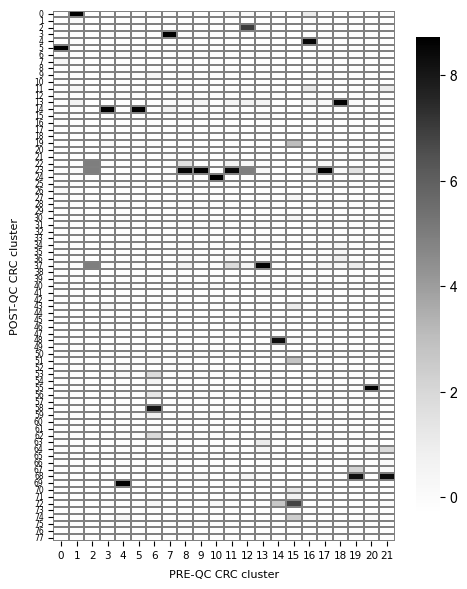

In [4]:
# normalize by row
# heatmap = heatmap.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# normalized by column
heatmap = (heatmap - heatmap.mean()) / heatmap.std()

# rescale columns in range 0-1
# heatmap = (heatmap - heatmap.min()) / heatmap.max()

fig, ax = plt.subplots(figsize=(5, 6))
plt.rcParams['font.family'] = 'Arial'

g = sns.heatmap(
    heatmap, xticklabels=1, yticklabels=1, cmap='Greys', square=False,
    linewidths=0.3, linecolor='grey', cbar_kws={'shrink': 0.9}, ax=ax)

g.set_xlabel('PRE-QC CRC cluster', fontsize=8, labelpad=6.0)
g.set_ylabel('POST-QC CRC cluster', fontsize=8, labelpad=10.0)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize=7.5, rotation=0)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize=5.5)

plt.tight_layout()
plt.savefig(os.path.join(out, 'pre-CRC_by_post_CRC.pdf'))
plt.show()
plt.close('all')

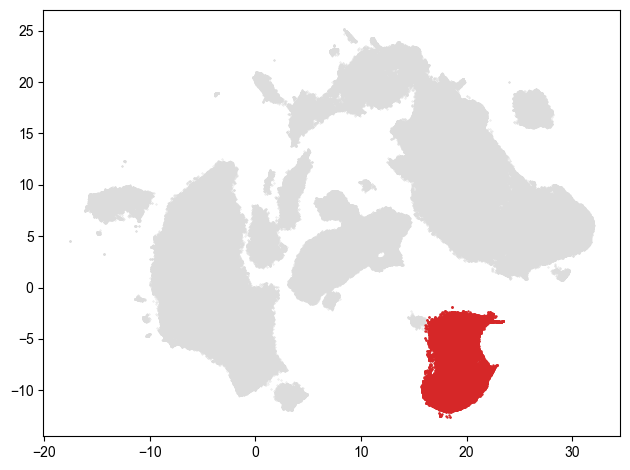

In [5]:
plt.scatter(pre['emb1'], pre['emb2'], s=0.1, c='gainsboro')
plt.scatter(
    pre['emb1'][pre['cluster_2d'] == 6], pre['emb2'][pre['cluster_2d'] == 6],
    s=0.5, c='tab:red'
)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(out, 'UMAP1.png'), dpi=800)
plt.close('all')

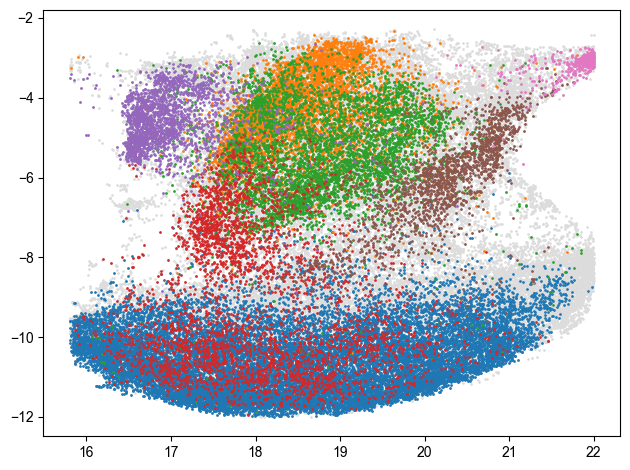

In [6]:
pre = pre[(pre['emb1'] > 15.8) & (pre['emb1'] < 22) & (pre['emb2'] < -2) & (pre['emb2'] > -12)]

plt.scatter(pre['emb1'], pre['emb2'], s=0.9, c='gainsboro')

post_cluster58 = post[post['cluster_2d'] == 58]
post_cluster62 = post[post['cluster_2d'] == 62]
post_cluster53 = post[post['cluster_2d'] == 53]
post_cluster56 = post[post['cluster_2d'] == 56]
post_cluster59 = post[post['cluster_2d'] == 59]
post_cluster54 = post[post['cluster_2d'] == 54]
post_cluster9 = post[post['cluster_2d'] == 9]

plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster58['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster58['CellID'])],
    s=0.9, c='tab:blue'
)
plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster62['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster62['CellID'])],
    s=0.9, c='tab:orange'
)
plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster53['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster53['CellID'])],
    s=0.9, c='tab:green'
)
plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster56['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster56['CellID'])],
    s=0.9, c='tab:red'
)
plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster59['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster59['CellID'])],
    s=0.9, c='tab:purple'
)
plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster54['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster54['CellID'])],
    s=0.9, c='tab:brown'
)
plt.scatter(
    pre['emb1'][pre['CellID'].isin(post_cluster9['CellID'])],
    pre['emb2'][pre['CellID'].isin(post_cluster9['CellID'])],
    s=0.9, c='tab:pink'
)
plt.tight_layout()
plt.savefig(os.path.join(out, 'UMAP2.png'), dpi=800)
plt.show()
plt.close('all')